In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./california_wildfire_data_cleaned.csv")
df.head()

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID
0,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,476.0,0.0,0.0,0.0,25.0,2013-02-24T08:16:00Z,2013-02-28T20:00:00Z,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23
1,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
2,2,Gold Fire,Madera,CAL FIRE Madera-Mariposa-Merced Unit,274.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30T12:59:00Z,2013-05-01T07:00:00Z,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb
3,3,Silverado Fire,Napa,CAL FIRE Sonoma-Lake-Napa Unit,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30T23:44:00Z,2013-05-01T17:15:00Z,-122.350844,38.441792,d8d1c943-7b5d-4885-9043-f41075d6eded
4,4,Yellow Fire,Sonoma,CAL FIRE Sonoma-Lake-Napa Unit,125.0,9.0,5.0,17.0,0.0,5.0,...,249.0,0.0,0.0,0.0,5.0,2013-05-01T02:01:00Z,2013-05-03T06:15:00Z,-122.655616,38.638828,64e4f81e-d872-44c4-ba8d-111fa77124ba


In [3]:
df.columns

Index(['Unnamed: 0', 'Incident Name', 'County', 'Administrative Unit',
       'Acres Burned', 'Crews Involved', 'Dozers', 'Engines', 'Fatalities',
       'Helicopters', 'Injuries', 'Personnel Involved', 'Structures Damaged',
       'Structures Destroyed', 'Structures Threatened', 'Water Tenders',
       'Fire Started', 'Fire Extinguished', 'Longitude', 'Latitude',
       'Incident ID'],
      dtype='object')

In [4]:
df.shape

(2779, 21)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df["County"].unique()

array(['Inyo', 'San Bernardino', 'Madera', 'Napa', 'Sonoma', 'Tehama',
       'Riverside', 'Glenn', 'San Benito', 'Kern, Ventura', 'Los Angeles',
       'San Luis Obispo', 'San Diego', 'Santa Barbara', 'San Joaquin',
       'Tuolumne', 'Butte', 'Merced', 'Lake', 'Alameda', 'Shasta',
       'Sonoma, Solano, Lake, Colusa', 'Amador', 'Placer', 'Fresno',
       'Mariposa', 'Solano', 'Monterey', 'Contra Costa', 'Modoc', 'Yuba',
       'El Dorado', 'Santa Clara', 'Stanislaus', 'Kern',
       'El Dorado, Sacramento', 'Calaveras', 'Mendocino', 'Siskiyou',
       'Humboldt', 'Lassen', 'Plumas', 'Tulare', 'Nevada', 'San Mateo',
       'Orange', 'Yolo', 'Ventura', 'Trinity', 'Napa, Lake',
       'Amador, El Dorado', 'Alpine', 'Lake, Napa', 'Sacramento', 'Mono',
       'El Dorado, Placer', 'Del Norte', 'Sutter', 'Kings', 'Imperial',
       'Sierra', 'Marin', 'Monterey, San Luis Obispo', 'Colusa',
       'Napa, Sonoma', 'Napa, Solano', 'Santa Cruz',
       'Santa Barbara, Ventura', 'Napa, Yolo', 'S

# Fatalities

In [7]:
df["Fire Started"] = pd.to_datetime(df["Fire Started"])
df["Fire Started"]

0      2013-02-24 08:16:00+00:00
1      2013-04-20 17:30:00+00:00
2      2013-04-30 12:59:00+00:00
3      2013-04-30 23:44:00+00:00
4      2013-05-01 02:01:00+00:00
                  ...           
2774   2025-01-23 09:41:57+00:00
2775   2025-01-23 13:58:00+00:00
2776   2025-01-23 14:42:58+00:00
2777   2025-01-23 16:40:30+00:00
2778   2025-01-29 12:53:53+00:00
Name: Fire Started, Length: 2779, dtype: datetime64[ns, UTC]

In [25]:
df_filter_fatalities = df[df["Fatalities"] > 0]
df_filter_fatalities

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID
308,308,Tassajara Fire,Monterey,CAL FIRE San Benito-Monterey Unit,1086.0,0.0,0.0,0.0,1.0,0.0,...,55.0,1.0,20.0,0.0,0.0,2015-09-19 15:00:00+00:00,2015-09-27T18:15:00Z,-121.589554,36.369964,1f54817c-8832-4a47-8ede-ab8072f52677
837,837,Tubbs Fire (Central LNU Complex),"Napa, Sonoma",CAL FIRE Sonoma-Lake-Napa Unit,36807.0,0.0,0.0,0.0,22.0,0.0,...,0.0,317.0,5636.0,0.0,0.0,2017-10-08 21:45:00+00:00,2018-02-09T09:27:00Z,-122.628790,38.608950,82c2aafa-ef04-49f0-a172-0dfa8a15582e
838,838,Cascade Fire (Wind Complex),Yuba,CAL FIRE Nevada-Yuba-Placer Unit,9989.0,0.0,0.0,0.0,4.0,0.0,...,0.0,10.0,264.0,0.0,0.0,2017-10-08 23:03:00+00:00,2018-02-09T09:39:00Z,-121.402100,39.321980,608ed849-d1ec-4b0d-a477-d1b8e9c7e6dd
839,839,Redwood Valley Fire (Mendocino Lake Complex),Mendocino,CAL FIRE Mendocinio Unit,36523.0,0.0,0.0,0.0,9.0,0.0,...,0.0,44.0,546.0,0.0,0.0,2017-10-08 23:36:00+00:00,2018-02-09T08:56:00Z,-123.166350,39.248730,c229ea5c-2ebd-4f80-892e-fc5da8a1eeea
850,850,Atlas Fire (Southern LNU Complex),"Napa, Solano",CAL FIRE Sonoma-Lake-Napa Unit,51624.0,0.0,0.0,0.0,6.0,0.0,...,0.0,783.0,120.0,0.0,0.0,2017-10-09 21:52:00+00:00,2018-02-09T09:37:00Z,-122.243670,38.392060,676946dc-1b38-4a09-9bbe-9ce638cfed52
851,851,Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...,"Napa, Sonoma",CAL FIRE Sonoma-Lake-Napa Unit,44573.0,0.0,0.0,0.0,3.0,0.0,...,0.0,172.0,1355.0,0.0,0.0,2017-10-09 22:00:00+00:00,2018-02-09T09:30:00Z,-122.520900,38.404100,be79d28c-767d-4a0d-b168-e86a5842004f
1025,1025,Klamathon Fire,Siskiyou,CAL FIRE Siskiyou Unit,38008.0,6.0,4.0,12.0,1.0,2.0,...,350.0,12.0,83.0,0.0,4.0,2018-07-05 12:31:00+00:00,2019-01-04T09:55:00Z,-122.534655,41.893332,d7e7eaca-5716-48b3-bd34-37acea282634
1081,1081,Carr Fire,"Shasta, Trinity","Unified Command: CAL FIRE Shasta-Trinity Unit,...",229651.0,5.0,48.0,11.0,3.0,0.0,...,456.0,61.0,1614.0,0.0,31.0,2018-07-23 13:15:00+00:00,2018-08-30T09:37:00Z,-122.623570,40.654280,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d
1090,1090,Ranch Fire (Mendocino Complex),"Colusa, Mendocino, Glenn, Lake",USFS Mendocino National Forest,410203.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,246.0,1050.0,0.0,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,-123.103367,39.243283,90b0daf7-5d84-42d9-bb35-bb78d4faf950
1189,1189,Camp Fire,Butte,"Unified Command: CAL FIRE, Butte County Sherif...",153336.0,11.0,3.0,73.0,85.0,2.0,...,1065.0,0.0,18804.0,0.0,3.0,2018-11-08 06:33:00+00:00,2018-11-25T08:00:00Z,-121.434700,39.813400,75dafe80-f18a-4a4a-9a37-4b564c5f6014


In [26]:
df_filter_fatalities["Fatalities"]

308      1.0
837     22.0
838      4.0
839      9.0
850      6.0
851      3.0
1025     1.0
1081     3.0
1090     1.0
1189    85.0
1194     3.0
1420     2.0
1423     1.0
Name: Fatalities, dtype: float64

In [40]:
df_fatalities = df_filter_fatalities.groupby([df_filter_fatalities["Fire Started"].dt.year]).agg(
    Incident_Count=("Incident Name",'count'),
    Total_Fatalities=("Fatalities",'sum')).reset_index()

df_fatalities

,Fire Started,Incident_Count,Total_Fatalities
0,2015,1,1.0
1,2017,5,44.0
2,2018,5,93.0
3,2019,2,3.0


In [41]:
df_fatalities.rename(columns={"Fire Started": "Year"}, inplace=True)
df_fatalities

,Year,Incident_Count,Total_Fatalities
0,2015,1,1.0
1,2017,5,44.0
2,2018,5,93.0
3,2019,2,3.0


# Correlations

In [21]:
correlation = df[["Crews Involved", "Acres Burned"]].corr()
correlation

,Crews Involved,Acres Burned
Crews Involved,1.000000,0.017612
Acres Burned,0.017612,1.000000


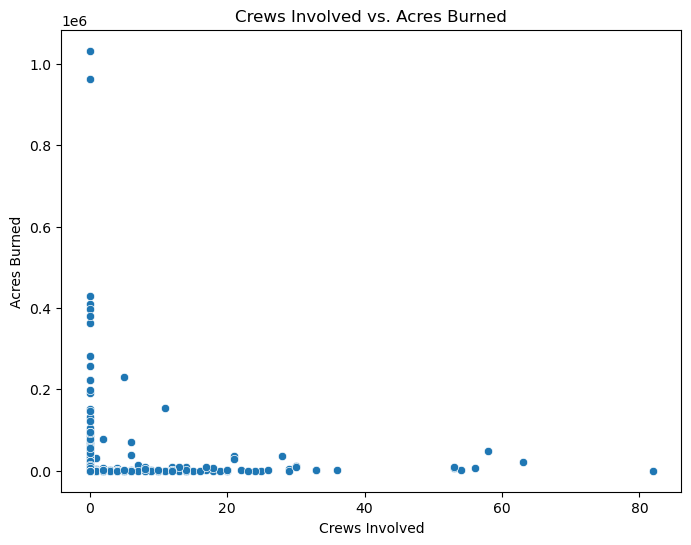

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Crews Involved", y="Acres Burned")
plt.title("Crews Involved vs. Acres Burned")
plt.xlabel("Crews Involved")
plt.ylabel("Acres Burned")
plt.show()

In [23]:
correlation2 = df[["Crews Involved", "Fatalities"]].corr()
correlation2

,Crews Involved,Fatalities
Crews Involved,1.000000,0.047367
Fatalities,0.047367,1.000000


In [24]:
correlation = df[["Structures Destroyed", "Acres Burned"]].corr()
correlation

,Structures Destroyed,Acres Burned
Structures Destroyed,1.000000,0.110039
Acres Burned,0.110039,1.000000


# Pie Graph

In [42]:
df_fatalities

,Year,Incident_Count,Total_Fatalities
0,2015,1,1.0
1,2017,5,44.0
2,2018,5,93.0
3,2019,2,3.0


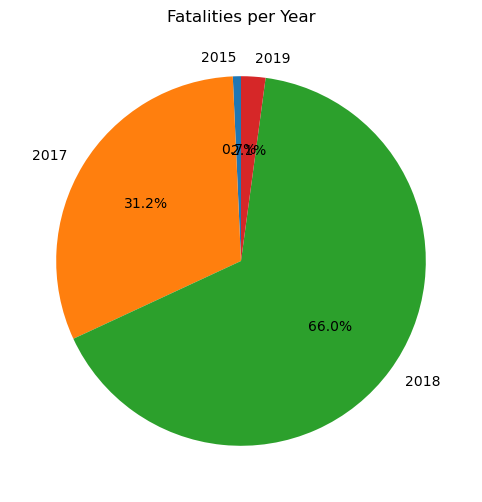

In [64]:
plt.figure(figsize=(8, 6))
plt.pie(df_fatalities["Total_Fatalities"], labels=df_fatalities["Year"], autopct="%1.1f%%", startangle=90)
plt.title("Fatalities per Year")
plt.show()